In [1]:
#Dependencies

import pandas as pd
import matplotlib.pyplot as plt


In [13]:
#import csv as dataframe
data_df=pd.read_csv('spreadspoke_scores.csv')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13788 entries, 0 to 13787
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        13788 non-null  object 
 1   schedule_season      13788 non-null  int64  
 2   schedule_week        13788 non-null  object 
 3   schedule_playoff     13788 non-null  bool   
 4   team_home            13788 non-null  object 
 5   score_home           13594 non-null  float64
 6   score_away           13594 non-null  float64
 7   team_away            13788 non-null  object 
 8   team_favorite_id     11115 non-null  object 
 9   spread_favorite      11115 non-null  float64
 10  over_under_line      11105 non-null  object 
 11  stadium              13788 non-null  object 
 12  stadium_neutral      13788 non-null  bool   
 13  weather_temperature  12410 non-null  float64
 14  weather_wind_mph     12394 non-null  float64
 15  weather_humidity     8468 non-null  

In [15]:
# Clean data - drop NaN in spreads

data_df=data_df.dropna(subset=['spread_favorite'])
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11115 entries, 170 to 13593
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        11115 non-null  object 
 1   schedule_season      11115 non-null  int64  
 2   schedule_week        11115 non-null  object 
 3   schedule_playoff     11115 non-null  bool   
 4   team_home            11115 non-null  object 
 5   score_home           11115 non-null  float64
 6   score_away           11115 non-null  float64
 7   team_away            11115 non-null  object 
 8   team_favorite_id     11115 non-null  object 
 9   spread_favorite      11115 non-null  float64
 10  over_under_line      11105 non-null  object 
 11  stadium              11115 non-null  object 
 12  stadium_neutral      11115 non-null  bool   
 13  weather_temperature  10102 non-null  float64
 14  weather_wind_mph     10086 non-null  float64
 15  weather_humidity     6379 non-null   fl

In [16]:
data_df.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
170,1/15/1967,1966,Superbowl,True,Green Bay Packers,35.0,10.0,Kansas City Chiefs,GB,-14.0,NaN,Los Angeles Memorial Coliseum,True,54.0,7.0,90.0,NaN
350,1/14/1968,1967,Superbowl,True,Green Bay Packers,33.0,14.0,Oakland Raiders,GB,-13.5,43,Orange Bowl,True,60.0,12.0,74.0,NaN
538,1/12/1969,1968,Superbowl,True,Baltimore Colts,7.0,16.0,New York Jets,IND,-18.0,40,Orange Bowl,True,66.0,12.0,80.0,rain
727,1/11/1970,1969,Superbowl,True,Kansas City Chiefs,23.0,7.0,Minnesota Vikings,MIN,-12.0,39,Tulane Stadium,True,55.0,14.0,84.0,rain
916,1/17/1971,1970,Superbowl,True,Baltimore Colts,16.0,13.0,Dallas Cowboys,IND,-2.5,36,Orange Bowl,True,59.0,11.0,60.0,NaN


In [42]:
# Home field advantage?

# Drop neutral venues

home_data= data_df.loc[data_df['stadium_neutral']!=True]

# add column for score difference

home_data["score_difference"]=home_data['score_home']-home_data['score_away']




C:\Users\tamhl\AppData\Local\Temp\ipykernel_16488\4069106810.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_data["score_difference"]=home_data['score_home']-home_data['score_away']


<function matplotlib.pyplot.show(close=None, block=None)>

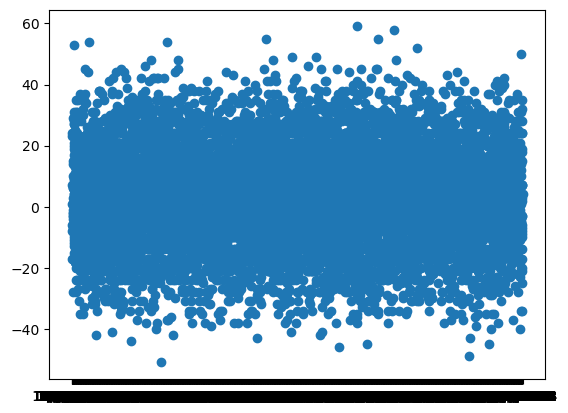

In [48]:
# graph score difference vs date by year
home_data_1994 = home_data.loc[home_data['schedule_season']==1994]
home_data_1994.head()
x_axis= home_data['schedule_date']
y_axis=home_data["score_difference"]

plt.scatter(x_axis, y_axis)
plt.show

In [ ]:
# Group by year and find averages for scoring_difference? W L